In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re

np.random.seed(42)
 
%config InlineBackend.figure_format = 'retina'

In [2]:
#download all the database (NYPD, LAPD,SFPD, Baltimore PD)

#append different dates for NYPD
nypd_historical = pd.read_csv('NYPD_Historic.csv')
nypd_current = pd.read_csv('NYPD_current.csv')

nypd = nypd_historical.append(nypd_current, sort=False)
sfpd = pd.read_csv('SFPD.csv')
lapd = pd.read_csv('LAPD.csv')
balt_pd = pd.read_csv('balt.csv')

sfpd = (sfpd[sfpd["year"] != '2018'])
lapd = (lapd[lapd["year"] != '2019'])
balt_pd = (balt_pd[balt_pd["year"] != '2019'])


/Users/jennycho/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
nypd['year']=(nypd['RPT_DT'].str[-4:])
nypd['month']=(nypd['RPT_DT'].str[:2])

sfpd['year']=(sfpd['Date'].str[-4:])
sfpd['month']=(sfpd['Date'].str[:2])

lapd['year']=(lapd['Date Reported'].str[-4:])
lapd['month']=(lapd['Date Reported'].str[:2])

balt_pd['year']=(balt_pd['CrimeDate'].str[-4:])
balt_pd['month']=(balt_pd['CrimeDate'].str[:2])

In [19]:
bpd = balt_pd.groupby(['year']).size()
sf = sfpd.groupby(['year']).size()
la = lapd.groupby(['year']).size()

In [ ]:
# sf annual report
plt.plot(sfpd.groupby(['year']).size())
plt.title('SFPD')
plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.show()

# la annual report
plt.plot(lapd.groupby(['year']).size())
plt.title('LAPD')
plt.xlabel('Year')
plt.show()

# ny annual report
plt.plot(nypd.groupby(['year']).size())
plt.title('NYPD')
plt.xlabel('Year')
plt.show()

# baltimore annual report
plt.plot(balt_pd.groupby(['year']).size())
plt.title('Baltimore PD')
plt.xlabel('Year')
plt.show()

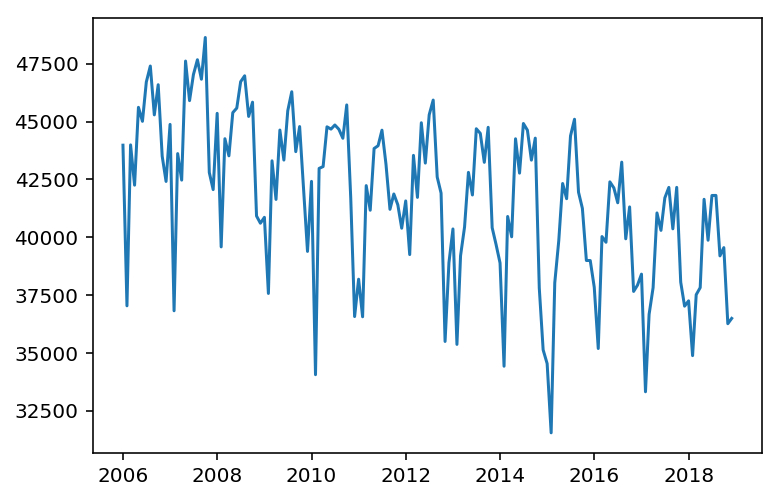

In [128]:
ny_month = nypd.groupby(["year","month"]).size()
ny_month = ny_month.reset_index()
ny_month.month = ny_month.month.astype(int)
ny_month.year = ny_month.year.astype(int)
ny_month.day = 1
ny_month["day"] = 1
ny_month["date"] = pd.to_datetime(ny_month[["year","month","day"]])
plt.plot( ny_month.date, ny_month[0] )

Text(0.5, 1.0, 'Baltimore PD')

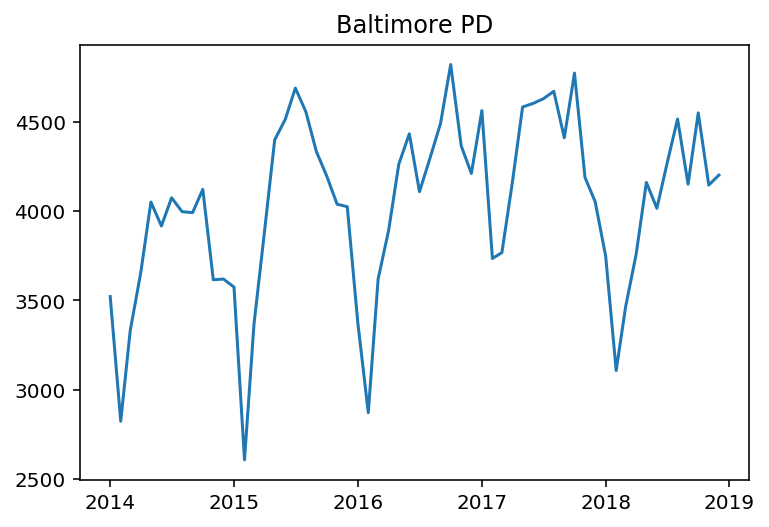

In [131]:
balt_month = balt_pd.groupby(["year","month"]).size()
balt_month = balt_month.reset_index()
balt_month.month = balt_month.month.astype(int)
balt_month.year = balt_month.year.astype(int)
balt_month.day = 1
balt_month["day"] = 1
balt_month["date"] = pd.to_datetime(balt_month[["year","month","day"]])
plt.plot( balt_month.date, balt_month[0] )
plt.title('Baltimore PD')

Text(0.5, 1.0, 'SFPD')

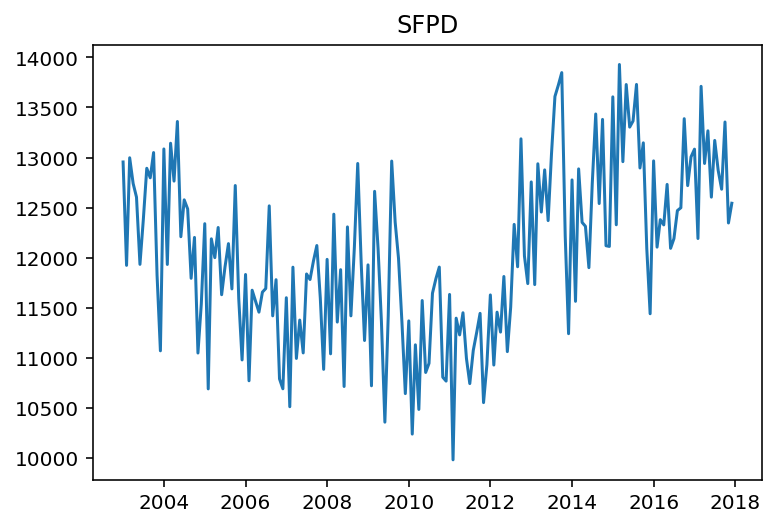

In [133]:
sf_month = sfpd.groupby(["year","month"]).size()
sf_month = sf_month.reset_index()
sf_month.month = sf_month.month.astype(int)
sf_month.year = sf_month.year.astype(int)
sf_month.day = 1
sf_month["day"] = 1
sf_month["date"] = pd.to_datetime(sf_month[["year","month","day"]])
plt.plot( sf_month.date, sf_month[0] )
plt.title('SFPD')

Text(0.5, 1.0, 'LAPD')

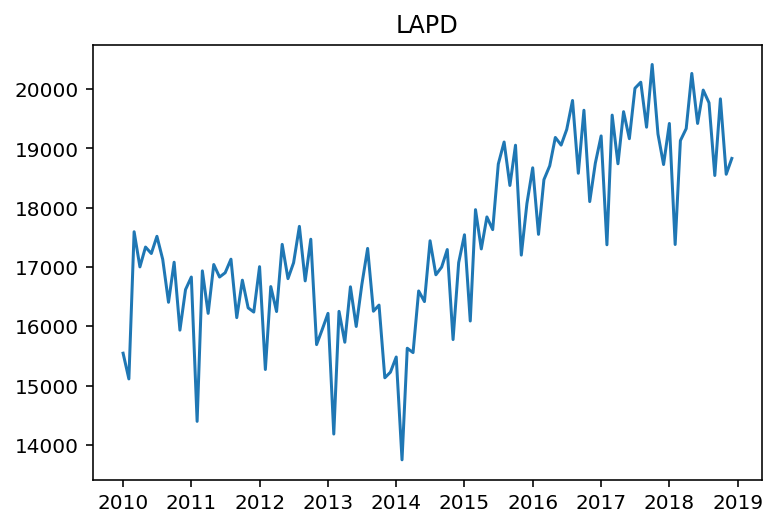

In [134]:
la_month = lapd.groupby(["year","month"]).size()
la_month = la_month.reset_index()
la_month.month = la_month.month.astype(int)
la_month.year = la_month.year.astype(int)
la_month.day = 1
la_month["day"] = 1
la_month["date"] = pd.to_datetime(la_month[["year","month","day"]])
plt.plot( la_month.date, la_month[0] )
plt.title('LAPD')

Text(0.5, 0, 'Year')

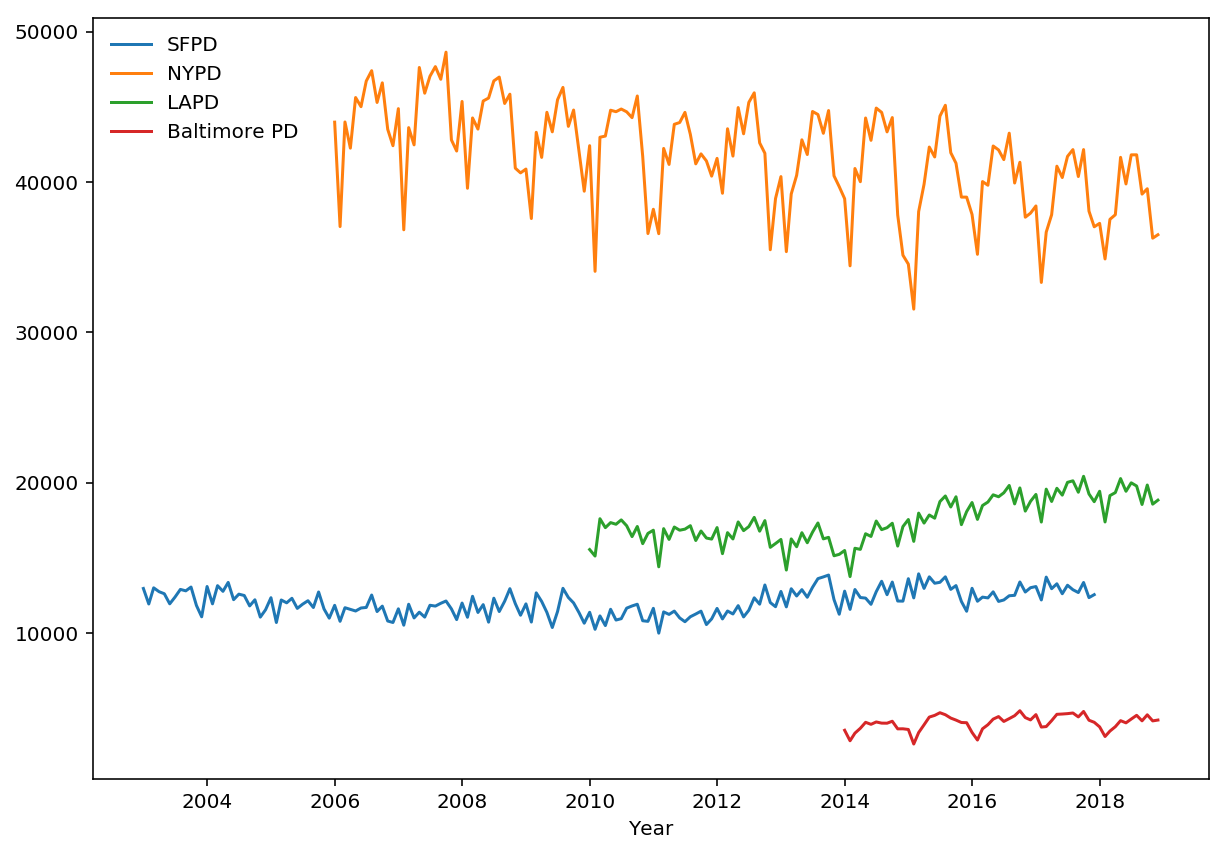

In [243]:
plt.plot(la_severe_month,la_severe_month['S.M.C.P.C'], label = 'SFPD')

Text(0.5, 0, 'Year')

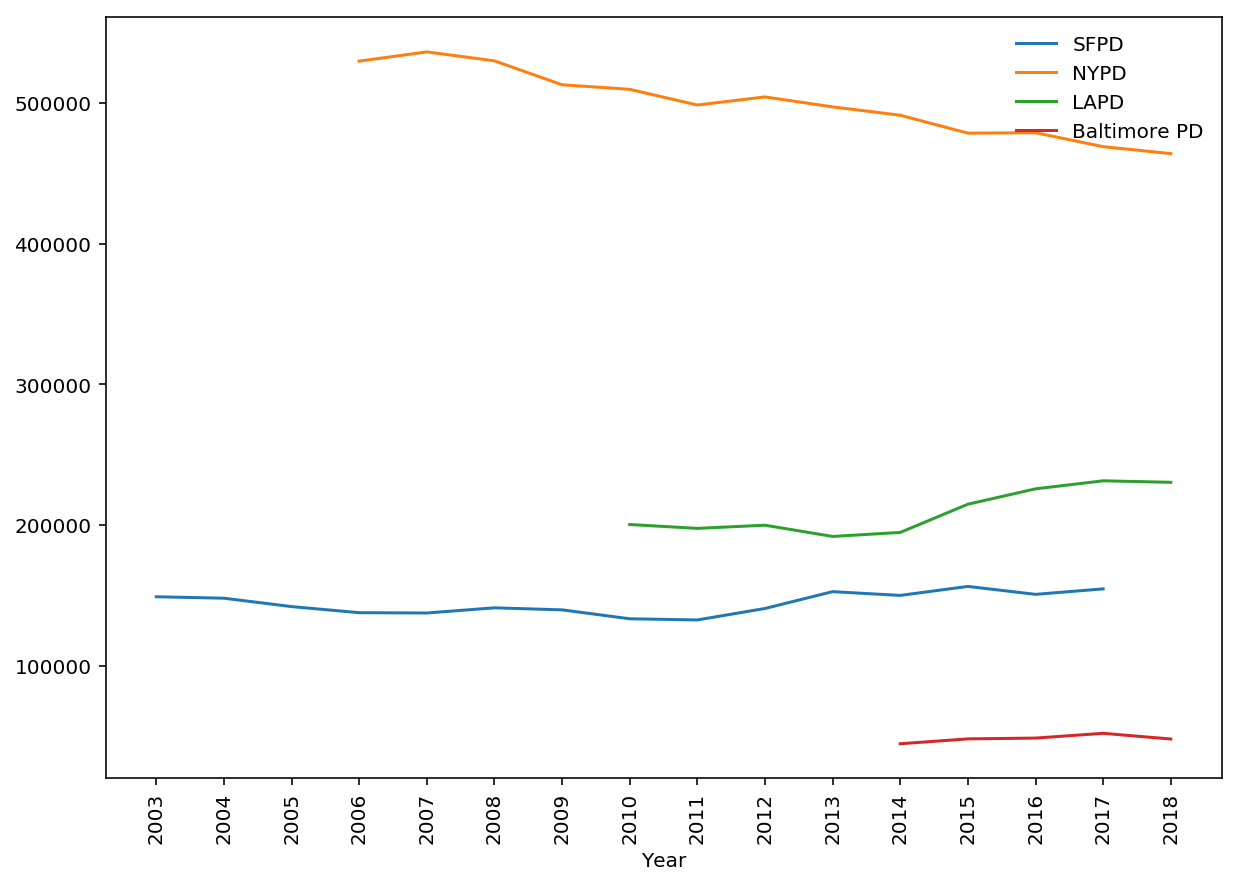

In [250]:
plt.figure(figsize = (10,7))
plt.plot(sfpd.groupby(['year']).size(), label = 'SFPD')
plt.plot(nypd.groupby(['year']).size(), label = 'NYPD')
plt.plot(lapd.groupby(['year']).size(), label = 'LAPD')
plt.plot(balt_pd.groupby(['year']).size(), label = 'Baltimore PD')
plt.legend(loc='upper right', frameon=False)

plt.xticks(rotation='vertical')
plt.xlabel('Year')

In [174]:
nypd['severe']=nypd['OFNS_DESC'].str.contains('assault|shooting|rape|sex crimes|kidnap|offenses related to children|manslaughter|battery|homocide|murder', flags=re.IGNORECASE, regex=True)
lapd['severe']=lapd['Crime Code Description'].str.contains('assault|shooting|rape|sex crimes|kidnap|offenses related to children|manslaughter|homocide|murder', flags=re.IGNORECASE, regex=True)
sfpd['severe']=sfpd['Descript'].str.contains('assault|shooting|rape|sex crimes|kidnap|offenses related to children|manslaughter|battery|force|homicide|murder', flags=re.IGNORECASE, regex=True)
balt_pd['severe']=balt_pd['Description'].str.contains('assault|shooting|rape|sex crimes|kidnap|offenses related to children|manslaughter|battery|force|homicide|murder', flags=re.IGNORECASE, regex=True)

In [195]:
severe_balt=balt_pd.loc[balt_pd['severe']==True]
severe_sfpd=sfpd.loc[sfpd['severe']==True]
severe_lapd=lapd.loc[lapd['severe']==True]
severe_nypd=nypd.loc[nypd['severe']==True]

In [445]:
lesser_sfpd = sfpd.loc[sfpd['severe']!=True]
lesser_balt = balt_pd.loc[balt_pd['severe']!=True]
lesser_lapd = lapd.loc[lapd['severe']!=True]
lesser_nypd = nypd.loc[nypd['severe']!=True]

In [444]:
# population_ny = pd.DataFrame(np.array([[2006,7.904],[2007,7.909],[2008,7.946],[2009,0.767,7.991],[2010,8.194],[2011,8.291],[2012,8.384],[2013,8.459],[2014,8.521],[2015,8.582],[2016,8.615],[2017,8.623],[2018,8.622]]), columns=['Year','New York'])
# population_sf = pd.DataFrame(np.array([[2004,.758],[2005,0.75],[2006,0.749],[2007,0.751],[2008,0.758],[2009,0.767],[2010,0.774],[2011,0.806],[2012,0.816,],[2013,0.83],[2014,0.841],[2015,0.854],[2016,0.866],[2017,0.876],[2018,0.884]]), columns=['Year','San Francisco'])

s= {'Year':[2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017],
    'SF_Population':[0.757,0.75,0.749,0.751,0.758,0.767,0.774,0.806,0.816,0.83,0.841,0.854,0.866,0.876,0.884],
    'Reports':sfpd.groupby(['year']).size().values.tolist(),
    'Red_Card':severe_sfpd.groupby(['year']).size().values.tolist(),
    'Yellow_Card':lesser_sfpd.groupby(['year']).size().values.tolist()}

n= {'Year':[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018],
    'NY_Population':[7.904,7.909,7.946,7.991,8.194,8.291,8.384,8.459,8.521,8.582,8.615,8.623,8.622],
    'Reports':nypd.groupby(['year']).size().values.tolist(),
    'Red_Card':severe_nypd.groupby(['year']).size().values.tolist(),
    'Yellow_Card':lesser_nypd.groupby(['year']).size().values.tolist()}

b= {'Year':[2014,2015,2016,2017,2018],
    'Baltimore_Population': [0.624,0.623,0.617,0.611,0.612],
    'Reports': balt_pd.groupby(['year']).size().values.tolist(),
    'Red_Card':severe_balt.groupby(['year']).size().values.tolist(),
    'Yellow_Card':lesser_balt.groupby(['year']).size().values.tolist()}

l= {'Year':[2010,2011,2012,2013,2014,2015,2016,2017,2018],
    'LA_Population': [3.796,3.825,3.859,3.892,3.923,3.953,3.981,4,4.056],
    'Reports':lapd.groupby(['year']).size().values.tolist(),
    'Red_Card':severe_lapd.groupby(['year']).size().values.tolist(),
    'Yellow_Card':lesser_lapd.groupby(['year']).size().values.tolist()}


In [379]:
sf_pop = pd.DataFrame(data=s)
ny_pop = pd.DataFrame(data=n)
balt_pop = pd.DataFrame(data=b)
la_pop = pd.DataFrame(data=l)

In [383]:
sf_pop['Normalized'] = sf_pop['Reports']/sf_pop['SF_Population']
ny_pop['Normalized'] = ny_pop['Reports']/ny_pop['NY_Population']
balt_pop['Normalized'] = balt_pop['Reports']/balt_pop['Baltimore_Population']
la_pop['Normalized'] = la_pop['Reports']/la_pop['LA_Population']

Text(0.5, 1.0, 'Crime Reports per Capita')

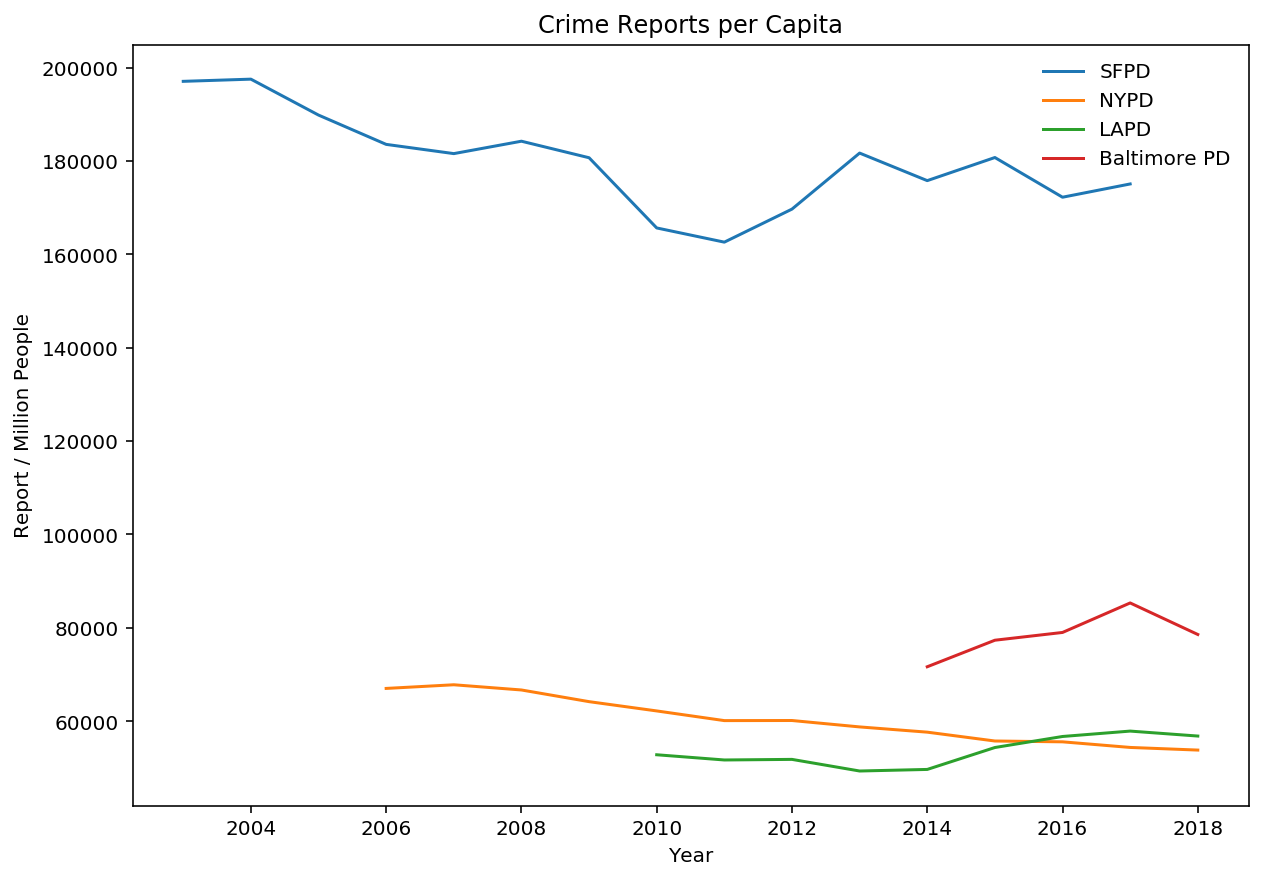

In [389]:
plt.figure(figsize = (10,7))
plt.plot(sf_pop['Year'],sf_pop['Normalized'], label = 'SFPD')
plt.plot(ny_pop['Year'],ny_pop['Normalized'], label = 'NYPD')
plt.plot(la_pop['Year'],la_pop['Normalized'], label = 'LAPD')
plt.plot(balt_pop['Year'],balt_pop['Normalized'], label = 'Baltimore PD')
plt.legend(loc='upper right', frameon=False)

#plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Report / Million People')
plt.title('Crime Reports per Capita')

In [381]:
sf_pop['Normalized_severe'] = sf_pop['Red_Card']/sf_pop['SF_Population']
ny_pop['Normalized_severe'] = ny_pop['Red_Card']/ny_pop['NY_Population']
balt_pop['Normalized_severe'] = balt_pop['Red_Card']/balt_pop['Baltimore_Population']
la_pop['Normalized_severe'] = la_pop['Red_Card']/la_pop['LA_Population']

sf_pop['Normalized_lesser'] = sf_pop['Yellow_Card']/sf_pop['SF_Population']
ny_pop['Normalized_lesser'] = ny_pop['Yellow_Card']/ny_pop['NY_Population']
balt_pop['Normalized_lesser'] = balt_pop['Yellow_Card']/balt_pop['Baltimore_Population']
la_pop['Normalized_lesser'] = la_pop['Yellow_Card']/la_pop['LA_Population']

Text(0.5, 1.0, 'Severe Crimes per Capita')

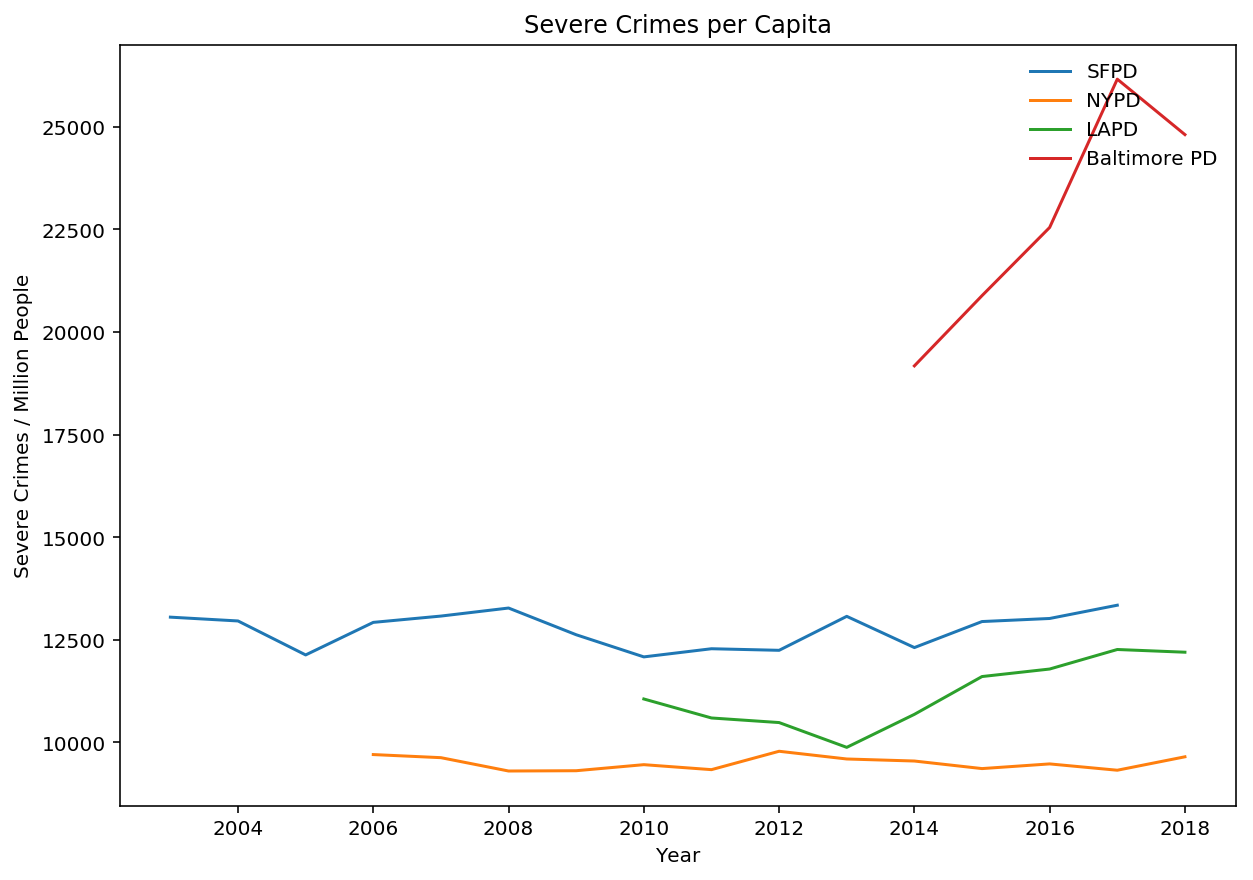

In [390]:
plt.figure(figsize = (10,7))
plt.plot(sf_pop['Year'],sf_pop['Normalized_severe'], label = 'SFPD')
plt.plot(ny_pop['Year'],ny_pop['Normalized_severe'], label = 'NYPD')
plt.plot(la_pop['Year'],la_pop['Normalized_severe'], label = 'LAPD')
plt.plot(balt_pop['Year'],balt_pop['Normalized_severe'], label = 'Baltimore PD')
plt.legend(loc='upper right', frameon=False)

#plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Severe Crimes / Million People')
plt.title('Severe Crimes per Capita')

Text(0.5, 1.0, 'Minor Crimes per Capita')

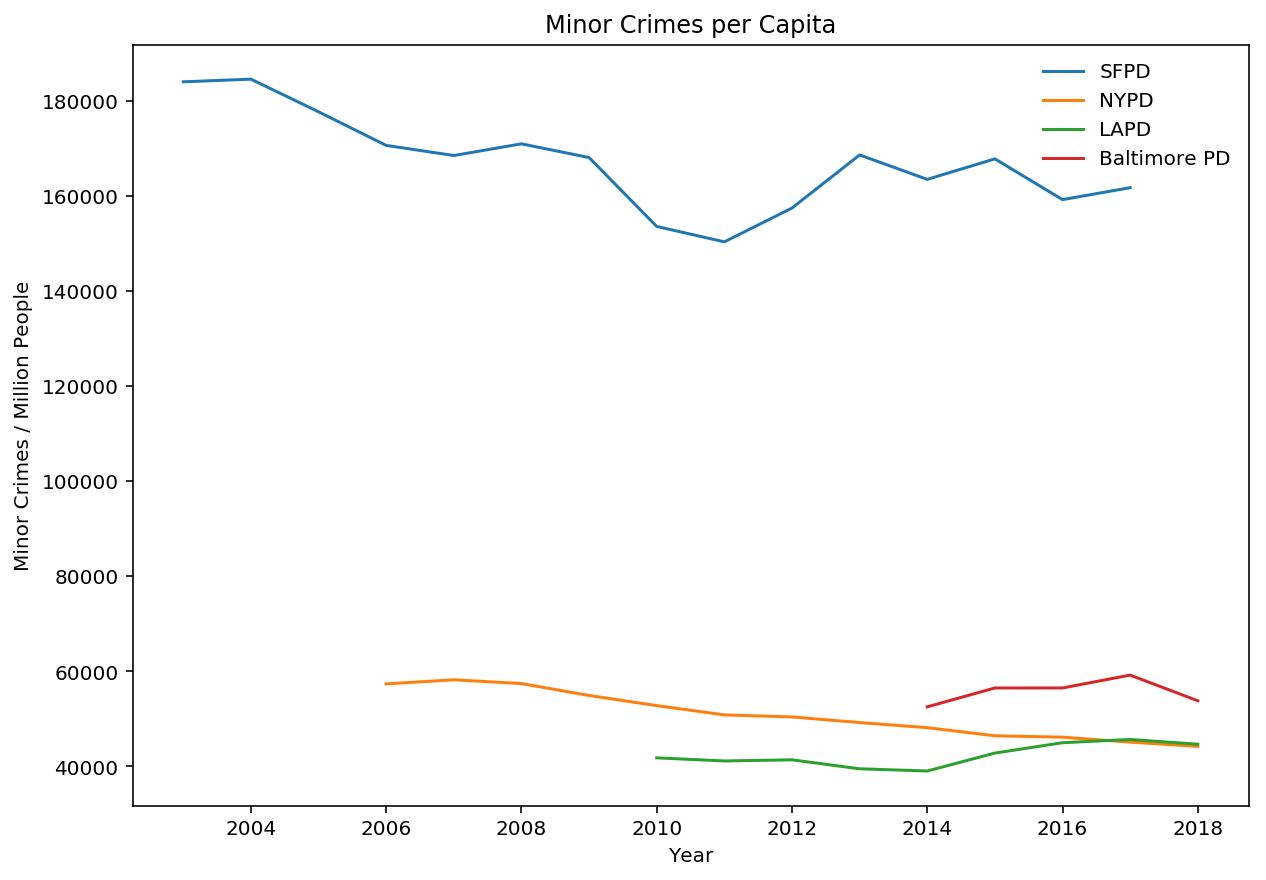

In [394]:
plt.figure(figsize = (10,7))
plt.plot(sf_pop['Year'],sf_pop['Normalized_lesser'], label = 'SFPD')
plt.plot(ny_pop['Year'],ny_pop['Normalized_lesser'], label = 'NYPD')
plt.plot(la_pop['Year'],la_pop['Normalized_lesser'], label = 'LAPD')
plt.plot(balt_pop['Year'],balt_pop['Normalized_lesser'], label = 'Baltimore PD')
plt.legend(loc='upper right', frameon=False)

#plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Minor Crimes / Million People')
plt.title('Minor Crimes per Capita')

In [407]:
shorten_nypd=nypd[['month','year','severe']]

In [400]:
nypd['severe']=nypd['OFNS_DESC'].str.contains('assault|shooting|rape|sex crimes|kidnap|offenses related to children|manslaughter|battery|homocide|murder', flags=re.IGNORECASE, regex=True)

Text(0.5, 1.0, 'LAPD')

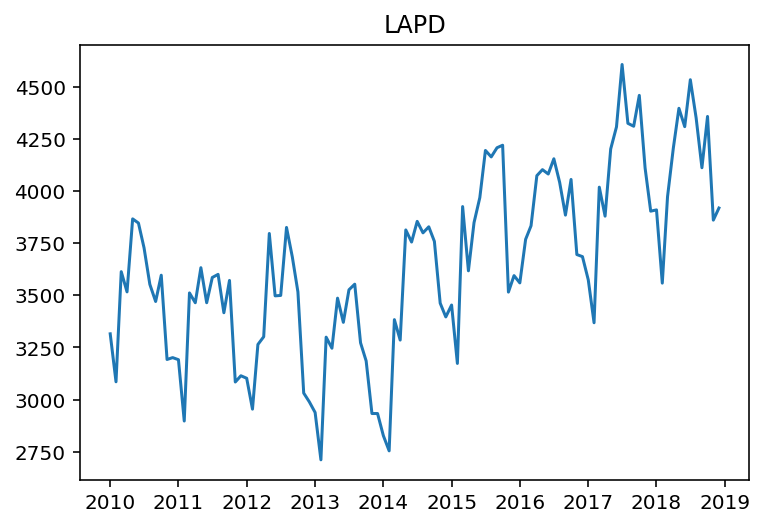

In [413]:
# monthly crime per capita
la_severe_month = severe_lapd.groupby(["year","month"]).size()
la_severe_month = la_severe_month.reset_index()
la_severe_month.month = la_severe_month.month.astype(int)
la_severe_month.year = la_severe_month.year.astype(int)
la_severe_month.day = 1
la_severe_month["day"] = 1
la_severe_month["date"] = pd.to_datetime(la_severe_month[["year","month","day"]])

ny_severe_month = severe_nypd.groupby(["year","month"]).size()
ny_severe_month = ny_severe_month.reset_index()
ny_severe_month.month = ny_severe_month.month.astype(int)
ny_severe_month.year = ny_severe_month.year.astype(int)
ny_severe_month.day = 1
ny_severe_month["day"] = 1
ny_severe_month["date"] = pd.to_datetime(ny_severe_month[["year","month","day"]])

sf_severe_month = severe_sfpd.groupby(["year","month"]).size()
sf_severe_month = sf_severe_month.reset_index()
sf_severe_month.month = sf_severe_month.month.astype(int)
sf_severe_month.year = sf_severe_month.year.astype(int)
sf_severe_month.day = 1
sf_severe_month["day"] = 1
sf_severe_month["date"] = pd.to_datetime(sf_severe_month[["year","month","day"]])

balt_severe_month = severe_balt.groupby(["year","month"]).size()
balt_severe_month = balt_severe_month.reset_index()
balt_severe_month.month = balt_severe_month.month.astype(int)
balt_severe_month.year = balt_severe_month.year.astype(int)
balt_severe_month.day = 1
balt_severe_month["day"] = 1
balt_severe_month["date"] = pd.to_datetime(balt_severe_month[["year","month","day"]])

In [446]:
# monthly crime per capita
la_lesser_month = lesser_lapd.groupby(["year","month"]).size()
la_lesser_month = la_lesser_month.reset_index()
la_lesser_month.month = la_lesser_month.month.astype(int)
la_lesser_month.year = la_lesser_month.year.astype(int)
la_lesser_month.day = 1
la_lesser_month["day"] = 1
la_lesser_month["date"] = pd.to_datetime(la_lesser_month[["year","month","day"]])

ny_lesser_month = lesser_nypd.groupby(["year","month"]).size()
ny_lesser_month = ny_lesser_month.reset_index()
ny_lesser_month.month = ny_lesser_month.month.astype(int)
ny_lesser_month.year = ny_lesser_month.year.astype(int)
ny_lesser_month.day = 1
ny_lesser_month["day"] = 1
ny_lesser_month["date"] = pd.to_datetime(ny_lesser_month[["year","month","day"]])

sf_lesser_month = lesser_sfpd.groupby(["year","month"]).size()
sf_lesser_month = sf_lesser_month.reset_index()
sf_lesser_month.month = sf_lesser_month.month.astype(int)
sf_lesser_month.year = sf_lesser_month.year.astype(int)
sf_lesser_month.day = 1
sf_lesser_month["day"] = 1
sf_lesser_month["date"] = pd.to_datetime(sf_lesser_month[["year","month","day"]])

balt_lesser_month = lesser_balt.groupby(["year","month"]).size()
balt_lesser_month = balt_lesser_month.reset_index()
balt_lesser_month.month = balt_lesser_month.month.astype(int)
balt_lesser_month.year = balt_lesser_month.year.astype(int)
balt_lesser_month.day = 1
balt_lesser_month["day"] = 1
balt_lesser_month["date"] = pd.to_datetime(balt_lesser_month[["year","month","day"]])

In [434]:
la_severe_month['population']=la_month
ny_severe_month['population']=ny_month
balt_severe_month['population']=balt_month
sf_severe_month['population']=sf_month

la_lesser_month['population']=la_month
ny_lesser_month['population']=ny_month
balt_lesser_month['population']=balt_month
sf_lesser_month['population']=sf_month

In [424]:
def month_pop(city):
    city_monthly_population = []
    for population in city:
        i=0
        while i< 12:
            city_monthly_population.append(population)
            i+=1
    return city_monthly_population

In [419]:
s_pop =[0.757,0.75,0.749,0.751,0.758,0.767,0.774,0.806,0.816,0.83,0.841,0.854,0.866,0.876,0.884]

n_pop =[7.904,7.909,7.946,7.991,8.194,8.291,8.384,8.459,8.521,8.582,8.615,8.623,8.622]
    
b_pop =[0.624,0.623,0.617,0.611,0.612]

l_pop =[3.796,3.825,3.859,3.892,3.923,3.953,3.981,4,4.056]

In [426]:
sf_month = month_pop(s_pop)
la_month = month_pop(l_pop)
ny_month = month_pop(n_pop)
balt_month = month_pop(b_pop)

In [450]:
la_lesser_month['S.M.C.P.C'] = la_lesser_month[0]/la_lesser_month['population']
sf_lesser_month['S.M.C.P.C'] = sf_lesser_month[0]/sf_lesser_month['population']
ny_lesser_month['S.M.C.P.C'] = ny_lesser_month[0]/ny_lesser_month['population']
balt_lesser_month['S.M.C.P.C'] = balt_lesser_month[0]/balt_lesser_month['population']

la_severe_month['S.M.C.P.C'] = la_severe_month[0]/la_severe_month['population']
sf_severe_month['S.M.C.P.C'] = sf_severe_month[0]/sf_severe_month['population']
ny_severe_month['S.M.C.P.C'] = ny_severe_month[0]/ny_severe_month['population']
balt_severe_month['S.M.C.P.C'] = balt_severe_month[0]/balt_severe_month['population']


Text(0.5, 1.0, 'Severe Monthly Crimes per Capita')

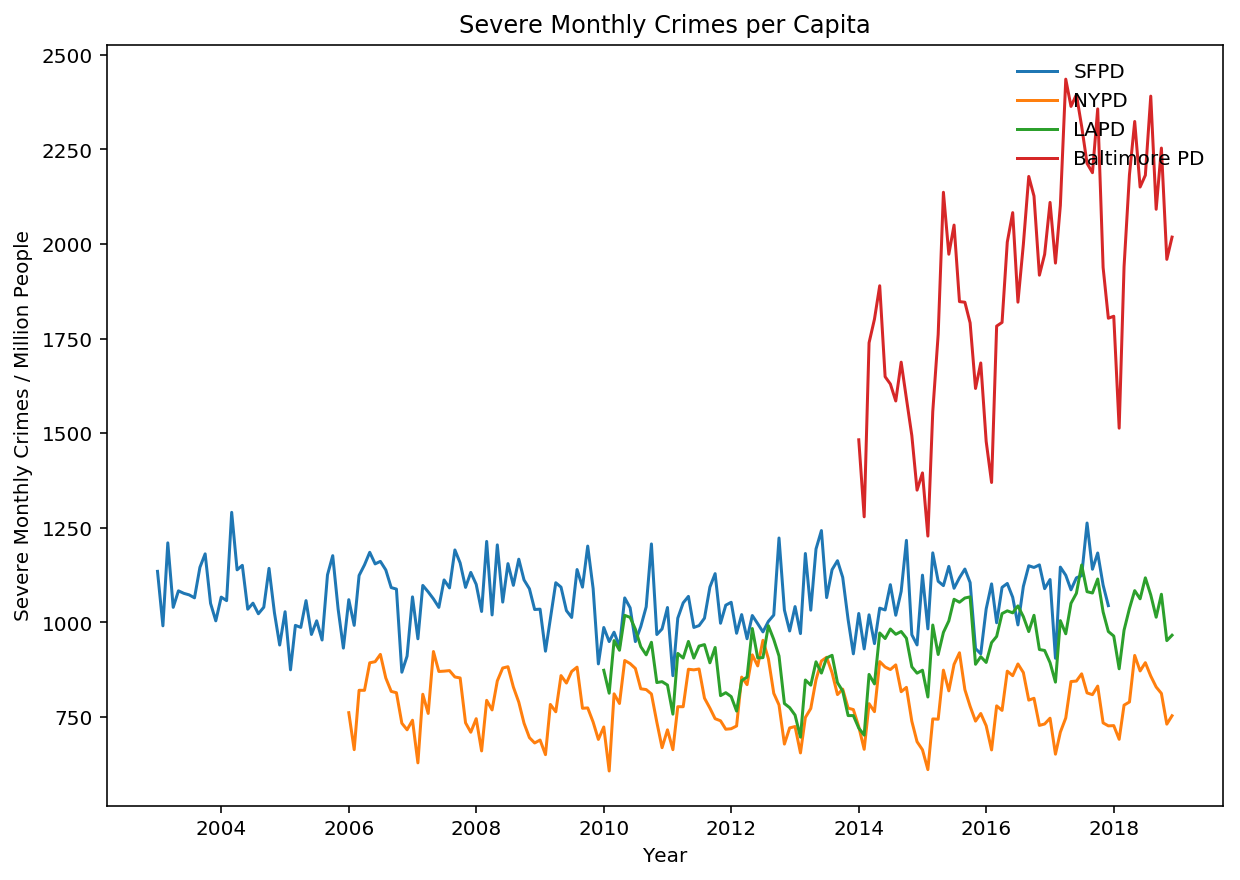

In [457]:
plt.figure(figsize = (10,7))
plt.plot(sf_severe_month.date ,sf_severe_month['S.M.C.P.C'], label = 'SFPD')
plt.plot(ny_severe_month.date ,ny_severe_month['S.M.C.P.C'], label = 'NYPD')
plt.plot(la_severe_month.date ,la_severe_month['S.M.C.P.C'], label = 'LAPD')
plt.plot(balt_severe_month.date ,balt_severe_month['S.M.C.P.C'], label = 'Baltimore PD')
plt.legend(loc='upper right', frameon=False)

#plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Severe Monthly Crimes / Million People')
plt.title('Severe Monthly Crimes per Capita')

Text(0.5, 1.0, 'Lesser Monthly Crimes per Capita')

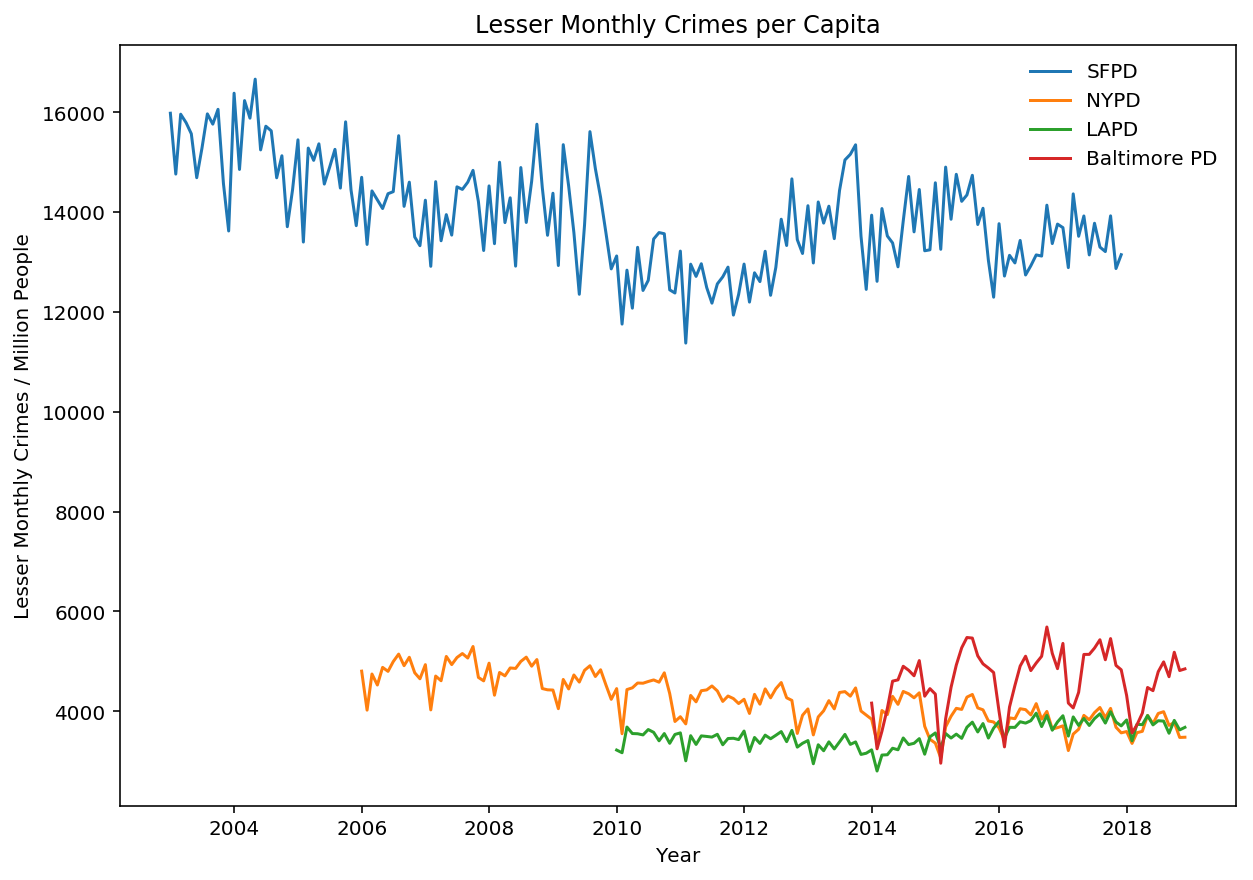

In [458]:
plt.figure(figsize = (10,7))
plt.plot(sf_lesser_month.date ,sf_lesser_month['S.M.C.P.C'], label = 'SFPD')
plt.plot(ny_lesser_month.date ,ny_lesser_month['S.M.C.P.C'], label = 'NYPD')
plt.plot(la_lesser_month.date ,la_lesser_month['S.M.C.P.C'], label = 'LAPD')
plt.plot(balt_lesser_month.date ,balt_lesser_month['S.M.C.P.C'], label = 'Baltimore PD')
plt.legend(loc='upper right', frameon=False)

#plt.xticks(rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Lesser Monthly Crimes / Million People')
plt.title('Lesser Monthly Crimes per Capita')

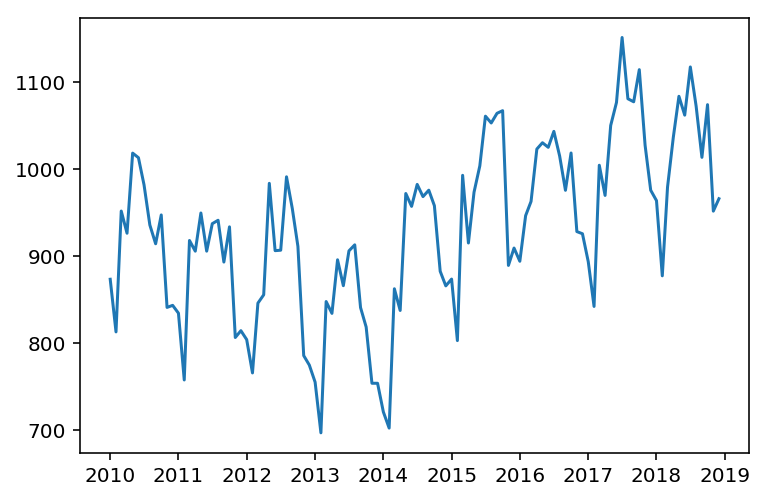

In [456]:
plt.plot(la_severe_month.date ,la_severe_month['S.M.C.P.C'], label = 'LAPD')